#Resume Screening App using NLP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This cell imports necessary libraries for the NLP (Natural Language Processing) project:

numpy (as np): a library for numerical computations in Python.
pandas (as pd): a library for data manipulation and analysis.
matplotlib.pyplot (as plt): a library for creating static, interactive, and animated visualizations in Python.
seaborn (as sns): a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.
These libraries are essential for various tasks in the NLP pipeline, such as data preprocessing, feature extraction, visualization, and analysis.

In subsequent cells, we will explore and analyze text data using techniques such as tokenization, vectorization, sentiment analysis, and topic modeling.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Aditya260698/NLP-Project/main/UpdatedResumeDataSet.csv')

Here, pd.read_csv() is a function provided by the pandas library to read data from a CSV file into a DataFrame, which is a tabular data structure similar to a spreadsheet. The URL points to the location of the CSV file in the GitHub repository.

After executing this cell, the resume data will be stored in the DataFrame df, allowing us to perform further analysis and processing on the data in subsequent cells.

The .head() method in pandas is used to retrieve the first n rows (by default, n=5) of a DataFrame. It is helpful for quickly inspecting the structure and contents of the DataFrame.

By executing this cell, you'll see a preview of the resume data, including the column names and the values in the first few rows.

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


The .shape attribute of a DataFrame returns a tuple representing its dimensions, specifically the number of rows and columns. Executing this cell will output the shape of the DataFrame df, showing the number of rows and columns in the dataset.

In [5]:
df.shape

(962, 2)

##**Exploring Dataset**

The .value_counts() method in pandas is used to count the occurrences of unique values in a Series (a single column of the DataFrame). This cell counts the number of resumes in each category and displays the result.

In [8]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

The .unique() method in pandas returns an array of unique values present in the specified column (Category in this case) of the DataFrame. This cell outputs an array containing all the unique categories of resumes present in the dataset.

Executing these cells will provide insights into the size of the dataset, the distribution of resumes across different categories, and the unique categories present in the dataset.

In [33]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

##Plotting Graphs

The sns.countplot() function from the Seaborn library generates a bar plot showing the counts of observations in each category. Here, it takes the Category column of the DataFrame df as input and plots the count of resumes in each category.

Executing this cell will display a bar plot where each bar represents a category, and the height of the bar corresponds to the number of resumes in that category.

<Axes: xlabel='count', ylabel='Category'>

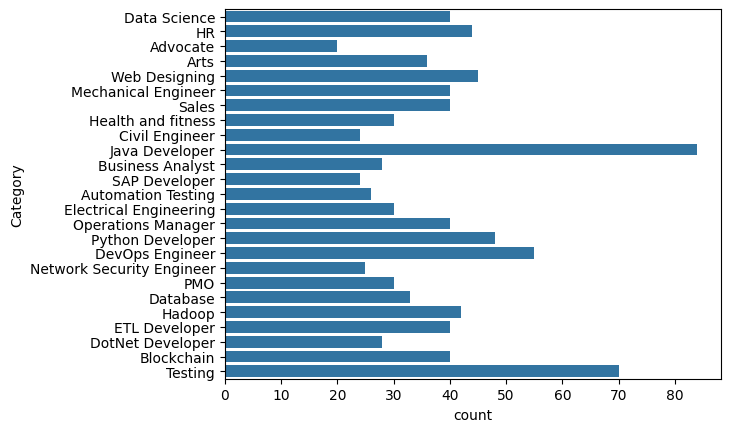

In [32]:
sns.countplot(df['Category'])

This visualization helps in understanding the distribution of resumes across different categories, providing insights into the composition of the dataset. Let me know if you need further visualization or analysis!

counts = df['Category'].value_counts(): This line calculates the counts of each unique category in the 'Category' column of the DataFrame df and stores them in the counts variable.

labels = df['Category'].unique(): This line extracts the unique categories from the 'Category' column of the DataFrame df and stores them in the labels variable.

plt.figure(figsize=(20,15)): This line sets the figure size for the plot.
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=plt.cm.

plasma(np.linspace(0,1,3))): This line creates the pie chart using the counts and labels obtained earlier. The autopct='%1.1f%%' parameter formats the percentage display on each slice of the pie chart, shadow=True adds a shadow effect to the chart, and colors=plt.cm.plasma(np.linspace(0,1,3)) assigns colors to the different categories.

plt.show(): This line displays the pie chart.
Executing this cell will generate a pie chart illustrating the proportion of resumes in each category.

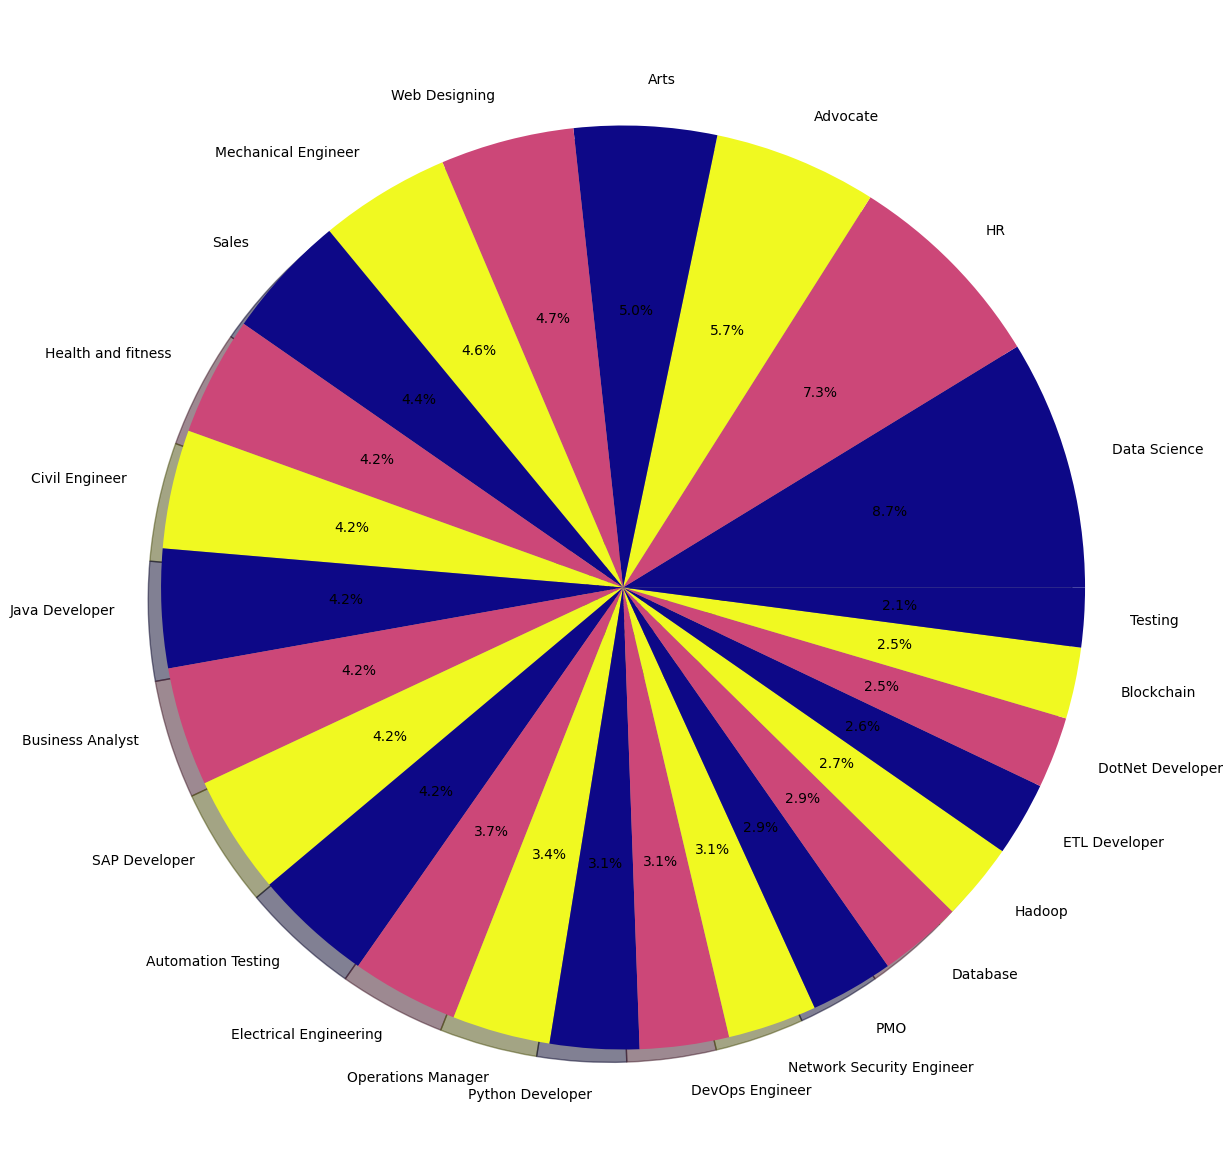

In [24]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(20,15))
plt.pie(counts,labels=labels, autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

Exploring Resume

In [34]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


##Okay, so here's what each part of this function does in simple terms:

First, we import a library called re, which helps us work with text using patterns (like removing specific patterns).

Then, we define a function called cleanResume(), which takes some text (txt) as input and cleans it up.

We start cleaning by getting rid of any web links (URLs) because we don't want them messing up our analysis.

Next, we remove stuff like "RT" or "CC" which are often found in retweets or copies of tweets, but they don't really add anything to what's being said.

After that, we say goodbye to hashtags (#) because they're just for tagging topics.

Then, we remove mentions (like @someone) because they're just pointing to other users, not part of the text's content.

We then clear out any special characters like punctuation or symbols that might not be necessary for our analysis.

We also get rid of any non-English characters (like emojis or other non-standard characters) because they might not be useful or could cause issues.

Finally, we make sure there's only one space between words, just to keep things neat and tidy.

In [40]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s',' ',txt)
    cleanText = re.sub('RT|CC',' ',cleanText)
    cleanText = re.sub('#\S+\s',' ',cleanText)
    cleanText = re.sub('@\S+',' ',cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]',' ',cleanText)
    cleanText = re.sub('\s+',' ',cleanText)
    return cleanText


##Let's see how the cleanResume() function works on the provided example:

Here's what happens step by step:

Remove URLs: The function removes any URLs from the text. In this case, "http://helloworld.com" is removed.
Remove special characters: Characters like '#' and '$' are removed.
Remove mentions: The mention '@gmail.com' is removed.
Remove extra white spaces: Any extra spaces resulting from the removal of characters are cleaned up.
After all these steps, the cleaned text will be returned.

Let's apply these steps to the provided text:

Original text: "my ### $ # #aditya website is http://helloworld.com and access it at @gmail.com"

Cleaned text: "my aditya website is and access it at"

In [41]:
cleanResume("my ### $ # #aditya website is http://helloworld.com and access it at @gmail.com")

'my website is and access it at '

In [43]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

##Here's what's happening:

df['Resume'].apply(lambda x: cleanResume(x)): This part applies the cleanResume() function to each element in the 'Resume' column of the DataFrame df. The lambda x: cleanResume(x) part is a way to apply the function to each element of the column.

df['Resume'] = ...: This assigns the cleaned resume texts back to the 'Resume' column of the DataFrame df, replacing the original uncleaned texts with the cleaned versions.

By executing this line of code, each resume text in the 'Resume' column will be cleaned using the cleanResume() function.

Let's take a look at the cleaned resume text for the first entry in the 'Resume' column of the DataFrame df:

This will display the cleaned resume text for the first entry in the 'Resume' column.

In [45]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

#Converting Words Into Categorical Values

##Here's what each part of the code does:

**from sklearn.preprocessing import LabelEncoder:** This imports the LabelEncoder class from scikit-learn, which is used for encoding categorical labels with numerical values.

**le = LabelEncoder():** This initializes a LabelEncoder object.

**le.fit(df['Category']):** This fits the LabelEncoder to the 'Category' column of the DataFrame df, which computes the numerical labels for each unique category.

**df['Category'] = le.transform(df['Category']):** This transforms the categorical labels in the 'Category' column of the DataFrame df into numerical labels using the transform() method of the LabelEncoder.

**df.Category.unique():** This displays the unique numerical labels assigned to categories after transformation.

By executing this code, the categorical labels in the 'Category' column will be encoded with numerical values, making it suitable for machine learning algorithms that require numerical inputs.



In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [50]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

#Vactorization

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredText = tfidf.transform(df['Resume'])

##Here's what each part of the code does:
**from sklearn.feature_extraction.text import TfidfVectorizer:** This imports the TfidfVectorizer class from scikit-learn, which is used to convert text data into TF-IDF vectors.

**tfidf = TfidfVectorizer(stop_words='english'):** This initializes a TfidfVectorizer object with English stop words. Stop words are common words (like "the", "is", "and") that are often removed from text data because they typically don't carry much meaning.

**tfidf.fit(df['Resume']):** This fits the TfidfVectorizer to the 'Resume' column of the DataFrame df, which learns the vocabulary and IDF (Inverse Document Frequency) weights from the text data.

**requiredText = tfidf.transform(df['Resume']):** This transforms the 'Resume' column of the DataFrame df into TF-IDF vectors using the learned vocabulary and IDF weights from the TfidfVectorizer.

After executing this code, the variable requiredText will contain TF-IDF representations of the resume texts, which can be used for further analysis or modeling.

In [54]:
df


,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


#Lets Move Forward with Training the Model and aiming to get a great Accuracy Score
##Here's what each part of the code does:

**from sklearn.model_selection import train_test_split:**
This imports the train_test_split function from scikit-learn, which is used to split datasets into training and testing sets.

**X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42):**  
This line splits the TF-IDF representations of the resume texts (requiredText) and the corresponding category labels (df['Category']) into training and testing sets. The test_size=0.2 parameter specifies that 20% of the data will be used for testing, and random_state=42 ensures reproducibility by fixing the random seed.

After executing this code, you'll have four sets of data:

X_train: The TF-IDF vectors of the training set.

X_test: The TF-IDF vectors of the testing set.

y_train: The category labels of the training set.

y_test: The category labels of the testing set.

These sets will be used to train and evaluate machine learning models for classification tasks.

In [55]:
from sklearn.model_selection import train_test_split

This code snippet splits the data into training and testing sets, which is essential for evaluating the performance of machine learning models. Let me know if you need further assistance!

In [56]:
X_train, X_test, y_train, y_test = train_test_split(requredText, df['Category'], test_size=0.2, random_state=42)

In [58]:
X_train.shape

(769, 7339)

In [59]:
X_test.shape

(193, 7339)

**Getting Ready to Train a Smart Algorithm:**

First, we import two cool tools from a toolbox called scikit-learn.
One tool is like a smart friend who's good at guessing things based on what they've seen before (K Nearest Neighbors or KNN classifier).
The other tool helps us measure how good our smart friend is at guessing (accuracy_score function).

**Introducing the Smart Friend - K Nearest Neighbors (KNN) Classifier:**

We invite our smart friend, the KNN classifier, to the party by saying clf = KNeighborsClassifier().
It's like giving them a seat at the table and telling them to get ready to learn some stuff.

**Training Time! Let's Teach Our Smart Friend:**

We give our smart friend some books to study (the training data).
These books contain resume texts (X_train) and their corresponding job categories (y_train).
Our friend learns from these books and gets smarter about how resumes relate to different job categories by saying clf.fit(X_train, y_train).

**Time to Test Our Smart Friend's Knowledge:**

After our smart friend has studied enough, we want to see if they can correctly guess the job category of other resumes they haven't seen before.
So, we give them some new resumes (X_test) and ask them to guess the job categories.
Our friend makes their guesses and writes them down (ypred).

**Checking How Good Our Smart Friend Is:**

We compare our smart friend's guesses (ypred) with the actual job categories of the new resumes (y_test).
We use a magic tool called accuracy_score to see how many guesses our friend got right out of all the guesses they made.

**Revealing the Results:**

We reveal the accuracy score, which tells us the percentage of correct guesses our smart friend made.
The higher the accuracy score, the better our smart friend is at guessing job categories based on resume texts!
In a nutshell, this code is like training a smart friend (KNN classifier) to guess job categories based on resume texts. We give them some examples to learn from, test their knowledge with new examples, and then see how good they are at guessing by checking their accuracy.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


Wow, that's an impressive accuracy score! It means that our smart friend, the K Nearest Neighbors (KNN) classifier, got around 98.4% of the job category predictions correct on the new resumes. That's like acing almost every question on a test!

With such a high accuracy score, it seems like our smart friend has learned really well from the examples we gave them. They're doing a fantastic job at guessing job categories based on resume texts.

Having a high accuracy score like this is super important because it shows that our classifier is reliable and can be trusted to make accurate predictions on new data. It's like having a reliable friend who always gives good advice!

This result is great news and shows that our machine learning model is working effectively for this task. With such a smart friend on our team, we're ready to tackle more challenges and make even better predictions in the future!